<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg"  width=400></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import torch

### 1. Нахождение сложной производной

Найдите производную по x от функции 
$$\sin\left(\tan(x)\frac{x^2}{y} + \ln(e^{-x^2 + 3}+x^3y)\right)\tan(x^2e^{x^9})$$

При этом надо пользоваться встроенным в PyTorch autograd. Численное вычисление производной может не дать нужный результат.

In [5]:
from torch.autograd import Variable

def find_x_derivative(xx, yy):
    x = torch.autograd.Variable(torch.Tensor([xx]), requires_grad = True)
    y = torch.tensor([yy], requires_grad = False)
    z = torch.sin(torch.tan(x) * (x ** 2 / y) + torch.log(torch.exp(-x ** 2 + 3) + x ** 3 * y)) * torch.tan(x ** 2 * torch.exp(x ** 9))
    z.backward()
    return x.grad

In [9]:
print(round(find_x_derivative(1, 21).item(), 3))

-9.021


# 2. Нахождение косинусной близости

Вам даны две матрицы A и B. Необходимо посчитать косинусную близость между строчками матрицы A и столбцами матрицы B. Ответ - матрица чисел, где номер строки - номер строки из матрицы А, а номер столбца - номер столбца из В, от которых бралась косинусная близость.

Напомним, что косинусная близость двух векторов - косинус угла между ними. В n-мерном пространстве косинус угла между веткорами удобнее всего через скалярное произведение:
$$\cos(angle(x, y)) = \frac{x \cdot y}{\left\|x\right\| \left\|y\right\|}$$

(Наша операция очень похожа на умножение матриц)

In [20]:
def get_cos_sim(A, B):
    cos = torch.matmul(A, B) / (torch.norm(A, dim = 1, keepdim = True) * torch.norm(B, dim = 0, keepdim = True))
    return cos

In [22]:
A = torch.FloatTensor([[1, -47, 25, -3], [10, 17, -15, 22], [-3, -7, 26, 36], [12, -27, -42, 0]])
B = (torch.FloatTensor([[-50, -13, 1, 10, 1242], [21, 48, -13, -14, -20], 
                        [20, 15, 11, 43, 11], [11, 103, 147, 27, -8]]))
print(round(torch.mean(get_cos_sim(A, B)).item(), 3))

0.15


# 3. Линейная регрессия

Раньше мы самостоятельно считали производные, чтобы находить веса линейной регрессии с помощью градиентного спуска. Теперь нам нужно использовать для этого PyTorch и его autograd. 

**Важно**: на самом деле .backward не обновляет содержимое матриц с производными (some_tensor.grad), а прибавляет к ним только что посчитаные значения проивзодных. Это значит, что вызвав .backward дважды, вы получите удвоенную производную. Так как мы обновляем веса в цикле и много раз вызываем .backward, то очень быстро мы получим мусор в some_tensor.grad, если не будем его каждый раз обнулять. Таким образом, в конц итериации после использования производных обнулите значения в матрице производных для всех нужных Вам переменных. Делается это вот так 
> some\_tensor.grad.data.zero_()

In [40]:
class LinearRegression:
    
    def get_loss(self, preds, y):
        #out = (preds - y).pow(2).sum() / len(y)
        return torch.sum((preds - y) * (preds - y)) / (preds - y).numel()
    
    def init_weights(self, input_size, output_size):
        torch.manual_seed(0) #необходимо для воспроизводимости результатов
        self.W = torch.rand(input_size, output_size, requires_grad = True)
        self.b = torch.zeros(1, output_size, requires_grad = True)

    def fit(self, X, y, num_epochs = 1000, lr = 0.001):
        self.init_weights(X.shape[1], y.shape[1])
        metrics = []
        for _ in range(num_epochs):
            preds = self.predict(X)
            self.get_loss(preds, y).backward()
            with torch.no_grad():
                self.W -= lr * self.W.grad
                self.b -= lr * self.b.grad
                self.W.grad.data.zero_()
                self.b.grad.data.zero_()
            metrics.append(self.get_loss(preds, y).data)
        return metrics

    def predict(self, X):
        return X @ self.W + self.b

1. Сгенерируйте данные с помощью make_regression с параметрами n_targets=3, n_features=2, noise=10, random_state=42. 
2. Обучите модель линейной регрессии, оставив в fit параметры num_epochs и lr по умолчанию (обратите внимание, что перед обучением нужно привести данные к типу, использующимся в torch) 
2. Посчитайте среднее значение метрики MSE по всем итерациям цикла в fit (массив из значений MSE на каждой итерации возвращается из метода fit). Ответом, который необходимо сдать в систему, будет число, округленное до 3х знаков после запятой.

In [41]:
from sklearn.datasets import make_regression

X, Y = make_regression(n_targets = 3, n_features = 2, noise = 10, random_state = 42)
X = torch.from_numpy(X).float()
Y = torch.from_numpy(Y).float()
model = LinearRegression()
mse = model.fit(X, Y)

In [42]:
print(round(np.mean(mse), 3))

4256.561


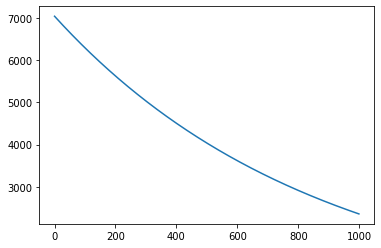

In [43]:
plt.plot(mse)

Здесь предлагаем протестировать метод predict удобным вам образом.